In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
import seaborn as sns
import time
# in house functions: 
%run 'DST_fun.ipynb' # model_report() and review_vector() 

train_df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col=0)
feature_cols = ['n_avis','sentiment_norm','longueur_texte']+ [colname for colname in train_df.columns if "bank_" in colname] 

y_train = train_df.etoiles
X_train = train_df.drop("etoiles", axis = 1)
X_train = train_df[feature_cols]

test_df = pd.read_csv('../data/avis/test_noYC_lemma_sent_equil.csv', index_col=0)
y_test = test_df['etoiles']
X_test = test_df.drop("etoiles", axis =1)
X_test = test_df[feature_cols]

model_name = "SVC"

#train.head()
X_train.head(2)

,n_avis,sentiment_norm,longueur_texte,bank__01BanqueenLigne,bank__Anytime,bank__BforBank,bank__Blank,bank__BoursoBank,bank__BoursoramaBanque,bank__Btocadvice,...,bank__ZELF,bank__bcfinance.fr,bank__floapay.com,bank__franfinance.fr,bank__ips,bank__laNef,bank__manager.one,bank__moneywalkie.com,bank__propulsebyca.fr,bank__qui-est-la-banque-la-moins-chere.com
5529,-0.426925,0.804014,-0.444335,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57109,-0.426925,0.974431,-0.512719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 0 Modelisation de base n_avis, length

# 1. modelisation n avis, sentiment, longeur txt

In [2]:
model_name

'SVC'

train score:  0.5
              precision    recall  f1-score   support

           1       0.57      0.62      0.59       562
           2       0.44      0.44      0.44       562
           3       0.42      0.40      0.41       562
           4       0.44      0.34      0.38       562
           5       0.58      0.68      0.63       562

    accuracy                           0.50      2810
   macro avg       0.49      0.50      0.49      2810
weighted avg       0.49      0.50      0.49      2810



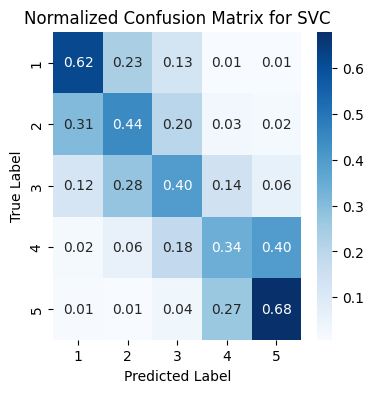

creating new csv for SVC


In [3]:
test_name =f"{model_name}- n_avis, sentiment, text length, companies"
model = svm.SVC(random_state = 7)
t0 = time.time()
model.fit(X_train, y_train)
model_report(test_name, model_name)

# 2. Grid SVM n_avis, sentiment, txt length

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.470 total time=  35.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.466 total time=  35.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.466 total time=  36.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.486 total time=  36.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.477 total time=  36.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=  37.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=  38.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=  38.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.492 total time=  38.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=  38.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.422 total time=  40.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf

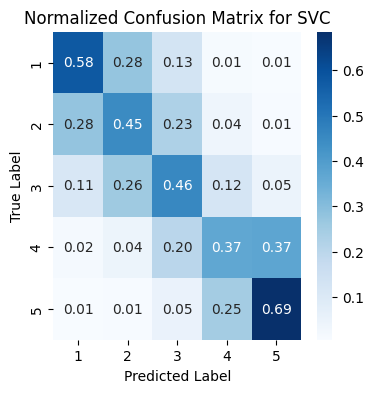

In [4]:
test_name =f"{model_name}- GRID n_avis, sentiment, text length, companies"
# definir des hyper paramètres à tester
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

# tester les différents paramètres
t0= time.time()
model = GridSearchCV(svm.SVC(random_state = 7), param_grid, n_jobs= -1,refit = True, verbose = 3)
model.fit(X_train, y_train)
print("best parameters", model.best_params_)
model_report(test_name, model_name)

# 3. Grid SVM: text TFIDF, n_avis, sent, length

In [5]:
test_name =f"{model_name}-text TFIDF, n_avis, sentiment, text length, companies"
# Vectorization des avis lémmatisés
X_train = review_vector(train_df, feature_cols)
X_test = review_vector(test_df, feature_cols)

model = svm.SVC(random_state = 7)
t0 = time.time()
model.fit(X_train, y_train)
# reporting
model_report(test_name, model_name)

NameError: name 'train' is not defined

In [ ]:
test_name =f"{model_name}- GRID text TFIDF, n_avis, sentiment, text length, companies"

# definir des hyper paramètres à tester
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

# tester les différents paramètres
t0= time.time()
model = GridSearchCV(svm.SVC(random_state = 7), param_grid, n_jobs= -1, refit = True, verbose = 3)
model.fit(X_train, y_train)
# reporting
model_report(test_name, model_name)

# Recap

In [ ]:
bench = pd.read_csv(f'../reports/benchmark/{model_name}_model_benchmark.csv', index_col=0).drop_duplicates(subset=['model'], keep= "last")
bench